

<a href='https://erdogant.medium.com/membership' target='_blank'><img height='200' style='border:0px;height:36px;' src='https://erdogant.github.io/clusteval/pages/html/_images/logo_large_3.png' border='0' alt='Follow me on Medium' /></a>


Welcome to the notebook of **clusteval**. Clusteval is a Python package for **unsupervised cluster evaluation**. Three well known methods are implemented that can be used to measure the goodness of the clustering approach; *silhouette*, *dbindex*, and *derivative*. The evaluation approaches can be applied on the most commonly used clustering approaches; *agglomerative*, *kmeans*, *dbscan* and *hdbscan*. There is no golden rule to define the optimal number of clusters. It requires investigation, and backtesting. 

There are a couple of common methods that can help you: 
<br>
<b>* Silhouette-score</b>
<br>
<b>* Inconsistency method</b>
<br>
<b>* Davies-Bouldin index</b>
<br>



---

## Read the Medium blog for more detailed information.

#### [1. A step-by-step guide for clustering images](https://towardsdatascience.com/a-step-by-step-guide-for-clustering-images-4b45f9906128)

#### [2. Detection of Duplicate Images Using Image Hash Functions](https://towardsdatascience.com/detection-of-duplicate-images-using-image-hash-functions-4d9c53f04a75)

#### [3. From Data to Clusters: When is Your Clustering Good Enough?](https://towardsdatascience.com/from-data-to-clusters-when-is-your-clustering-good-enough-5895440a978a)

#### [4. From Clusters To Insights; The Next Step](https://towardsdatascience.com/from-clusters-to-insights-the-next-step-1c166814e0c6)


---

## Github
* [Github](https://github.com/erdogant/clusteval)
* [Documentation pages](https://erdogant.github.io/clusteval/)

---

## Support
This library runs on coffee :) You can [support](https://erdogant.github.io/pca/pages/html/Documentation.html) in various ways, have a look at the [sponser page](https://erdogant.github.io/pca/pages/html/Documentation.html). Report bugs, issues and feature extensions at [github page](https://github.com/erdogant/pca).

<a href='https://www.buymeacoffee.com/erdogant' target='_blank'><img height='36' style='border:0px;height:36px;' src='https://cdn.ko-fi.com/cdn/kofi1.png?v=3' border='0' alt='Buy Me a Coffee at ko-fi.com' /></a>
<a href='https://erdogant.medium.com/membership' target='_blank'><img height='50' style='border:0px;height:36px;' src='https://erdogant.github.io/images/medium_follow_me.jpg' border='0' alt='Follow me on Medium' /></a>

---



**Installation of libraries**

In [14]:
!pip install -U scatterd
!pip install -U clusteval
!pip install -U datazets
!pip install -U df2onehot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Attempting uninstall: datazets
    Found existing installation: datazets 0.1.5
    Uninstalling datazets-0.1.5:
      Successfully uninstalled datazets-0.1.5


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9657 sha256=c1d34686a51ac76d468711f00b6fd100839d8b819b74e89c0bed09606bf79103
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget


In [15]:
# Libraries
import numpy as np
import pandas as pd

from clusteval import clusteval
from scatterd import scatterd
import datazets as dz
from df2onehot import df2onehot

# Import data set

In this notebook we are going to analyze the [Data Science salary data set](https://www.kaggle.com/code/dima806/aiml-salaries-2022-2023-explain/notebook) set from kaggle.

In [50]:
df = pd.read_csv('ds_salaries.zip')
#df = dz.get('ds_salaries.zip')

# Remove columns
df.drop(labels=['salary_currency', 'salary',], inplace=True, axis=1)

# Replace pattern of string using regular expression.
df['experience_level'] = df['experience_level'].replace({'EN':'Entry-level', 'MI':'Junior Mid-level', 'SE':'Intermediate Senior-level', 'EX':'Expert Executive-level / Director'}, regex=True)
df['employment_type'] = df['employment_type'].replace({'PT':'Part-time', 'FT':'Full-time', 'CT':'Contract', 'FL':'Freelance'}, regex=True)
df['company_size'] = df['company_size'].replace({'S':'Small (less than 50)', 'M':'Medium (50 to 250)', 'L':'Large (>250)'}, regex=True)
df['remote_ratio'] = df['remote_ratio'].replace({0:'No remote', 50:'Partially remote', 100:'>80% remote'}, regex=True)
df['work_year'] = df['work_year'].astype(str)


In [51]:
df

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,Junior Mid-level,Full-time,AWS Data Architect,258000,US,>80% remote,US,Large (>250)
1,2023,Intermediate Senior-level,Full-time,Data Scientist,225000,US,No remote,US,Medium (50 to 250)
2,2023,Intermediate Senior-level,Full-time,Data Scientist,156400,US,No remote,US,Medium (50 to 250)
3,2023,Intermediate Senior-level,Full-time,Data Engineer,190000,US,>80% remote,US,Medium (50 to 250)
4,2023,Intermediate Senior-level,Full-time,Data Engineer,150000,US,>80% remote,US,Medium (50 to 250)
...,...,...,...,...,...,...,...,...,...
4129,2020,Intermediate Senior-level,Full-time,Data Scientist,412000,US,>80% remote,US,Large (>250)
4130,2021,Junior Mid-level,Full-time,Principal Data Scientist,151000,US,>80% remote,US,Large (>250)
4131,2020,Entry-level,Full-time,Data Scientist,105000,US,>80% remote,US,Small (less than 50)
4132,2020,Entry-level,Contract,Business Data Analyst,100000,US,>80% remote,US,Large (>250)


In [54]:
dfhot = df2onehot(df, verbose=4, dtypes=['cat','cat','cat','cat','float','cat','cat','cat','cat'])['onehot']

[df2onehot] >Set dtypes in dataframe..
[df2onehot] >work_year
[df2onehot] >experience_level
[df2onehot] >employment_type
[df2onehot] >job_title
[df2onehot] >salary_in_usd
[df2onehot] >employee_residence
[df2onehot] >remote_ratio
[df2onehot] >company_location
[df2onehot] >company_size
[df2onehot] >Processing: work_year........... [4]
[df2onehot] >Processing: experience_level.... [4]
[df2onehot] >Processing: employment_type..... [4]
[df2onehot] >Processing: job_title........... [99]
[df2onehot] >Processing: salary_in_usd....... [1088]
[df2onehot] >Processing: employee_residence.. [80]
[df2onehot] >Processing: remote_ratio........ [3]
[df2onehot] >Processing: company_location.... [74]
[df2onehot] >Processing: company_size........ [3]
[df2onehot] >Total onehot features: 1359


In [55]:
dfhot

,work_year_2020,work_year_2021,work_year_2022,work_year_2023,experience_level_Entry-level,experience_level_Expert Executive-level / Director,experience_level_Intermediate Senior-level,experience_level_Junior Mid-level,employment_type_Contract,employment_type_Freelance,...,company_location_SM,company_location_TH,company_location_TR,company_location_UA,company_location_US,company_location_VN,company_location_ZA,company_size_Large (>250),company_size_Medium (50 to 250),company_size_Small (less than 50)
0,False,False,False,True,False,False,False,True,False,False,...,False,False,False,False,True,False,False,True,False,False
1,False,False,False,True,False,False,True,False,False,False,...,False,False,False,False,True,False,False,False,True,False
2,False,False,False,True,False,False,True,False,False,False,...,False,False,False,False,True,False,False,False,True,False
3,False,False,False,True,False,False,True,False,False,False,...,False,False,False,False,True,False,False,False,True,False
4,False,False,False,True,False,False,True,False,False,False,...,False,False,False,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4129,True,False,False,False,False,False,True,False,False,False,...,False,False,False,False,True,False,False,True,False,False
4130,False,True,False,False,False,False,False,True,False,False,...,False,False,False,False,True,False,False,True,False,False
4131,True,False,False,False,True,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,True
4132,True,False,False,False,True,False,False,False,True,False,...,False,False,False,False,True,False,False,True,False,False


In [118]:
from sklearn.manifold import TSNE
xycoord = TSNE(n_components=2, init='random', perplexity=30).fit_transform(dfhot.values)


In [131]:
ce = clusteval(cluster='dbscan')
ce = clusteval(cluster='dbscan', metric='euclidean', linkage='complete', min_clust=7, normalize=True, verbose='info')

#ce = clusteval(evaluate='silhouette', metric='euclidean', linkage='ward', min_clust=13, max_clust=25, normalize=False)
#cl_hamm = clusteval(evaluate='silhouette', metric='hamming', linkage='complete', min_clust=5, max_clust=25, normalize=False)

In [132]:
ce.fit(xycoord);
#ce.fit(dfhot);
#cl_hamm.fit(dfhot);

[datazets] >INFO> Saving data in memory.
[datazets] >INFO> Fit with method=[dbscan], metric=[euclidean], linkage=[ward]
[datazets] >INFO> Gridsearch across Epsilon.
[datazets] >INFO> Evaluate using silhouette..
[clusteval] >INFO: 100%|██████████| 245/245 [00:32<00:00,  7.52it/s]
[datazets] >INFO> Compute dendrogram threshold.
[datazets] >INFO> Optimal number clusters detected: [25].
[datazets] >INFO> Fin.


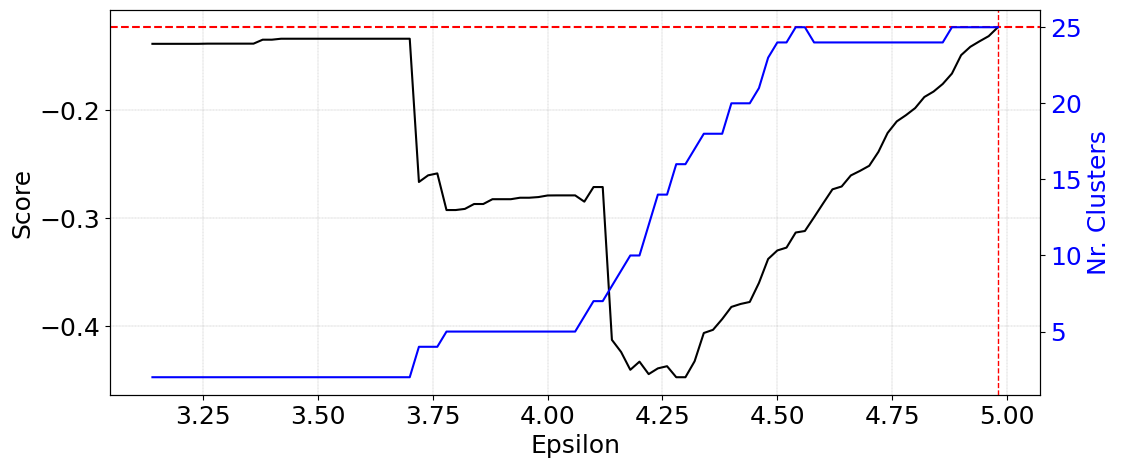

(<Figure size 1200x500 with 2 Axes>,
 (<Axes: xlabel='Epsilon', ylabel='Score'>, <Axes: ylabel='Nr. Clusters'>))

In [133]:
ce.plot(figsize=(12,5))
#cl_hamm.plot(figsize=(12,5))


[datazets] >INFO> Retrieving input data set.
[datazets] >INFO> Retrieving previously computed [tsne] embedding.
[datazets] >INFO> Estimated number of n_clusters: 24, average silhouette_score=-0.092


[colourmap]> Warning: Colormap [tab20c] can not create [25] unique colors! Available unique colors: [20].


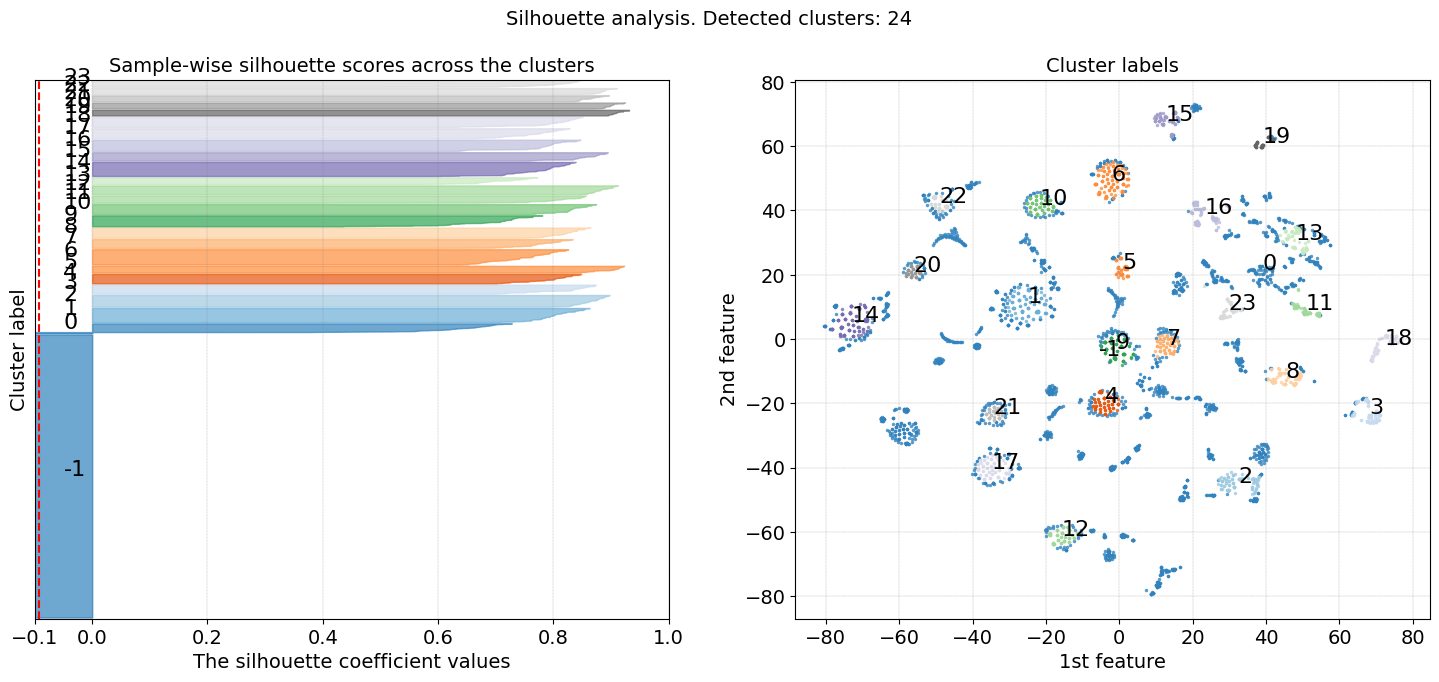

(<Figure size 1800x700 with 2 Axes>,
 <Axes: title={'center': 'Sample-wise silhouette scores across the clusters'}, xlabel='The silhouette coefficient values', ylabel='Cluster label'>,
 <Axes: title={'center': 'Cluster labels'}, xlabel='1st feature', ylabel='2nd feature'>)

In [137]:
#ce.plot_silhouette()
ce.plot_silhouette(embedding='tsne')


[datazets] >INFO> Retrieving input data set.
[datazets] >INFO> Coordinates (x, y) are set based on the first two features.


[colourmap]> Warning: Colormap [tab20c] can not create [25] unique colors! Available unique colors: [20].


(<Figure size 800x600 with 1 Axes>, <Axes: xlabel='x-axis', ylabel='y-axis'>)

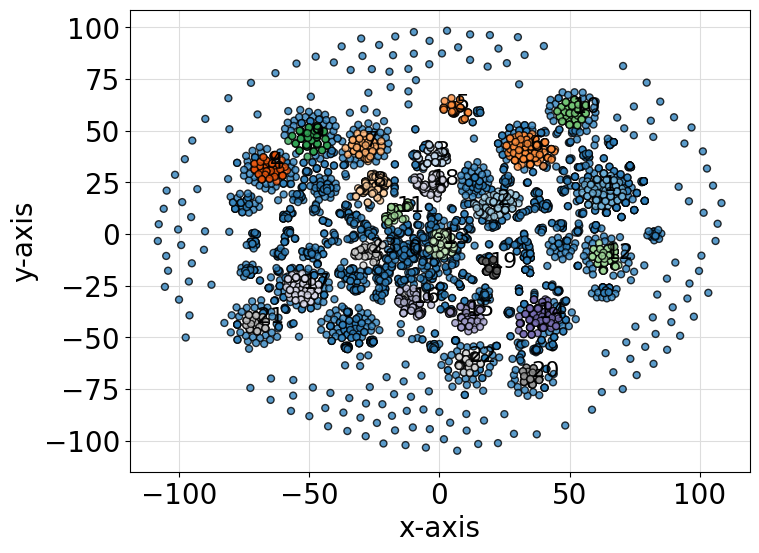

In [136]:
ce.scatter(figsize=(8, 6))
#ce.scatter(figsize=(8, 6), embedding='tsne')
#cl_hamm.scatter(figsize=(8, 6), embedding='tsne')

[datazets] >INFO> Retrieving input data set.
[datazets] >INFO> Plotting the dendrogram with optimized settings: metric=euclidean, linkage=ward, max_d=258.417. Be patient now..
[datazets] >INFO> Compute cluster labels.


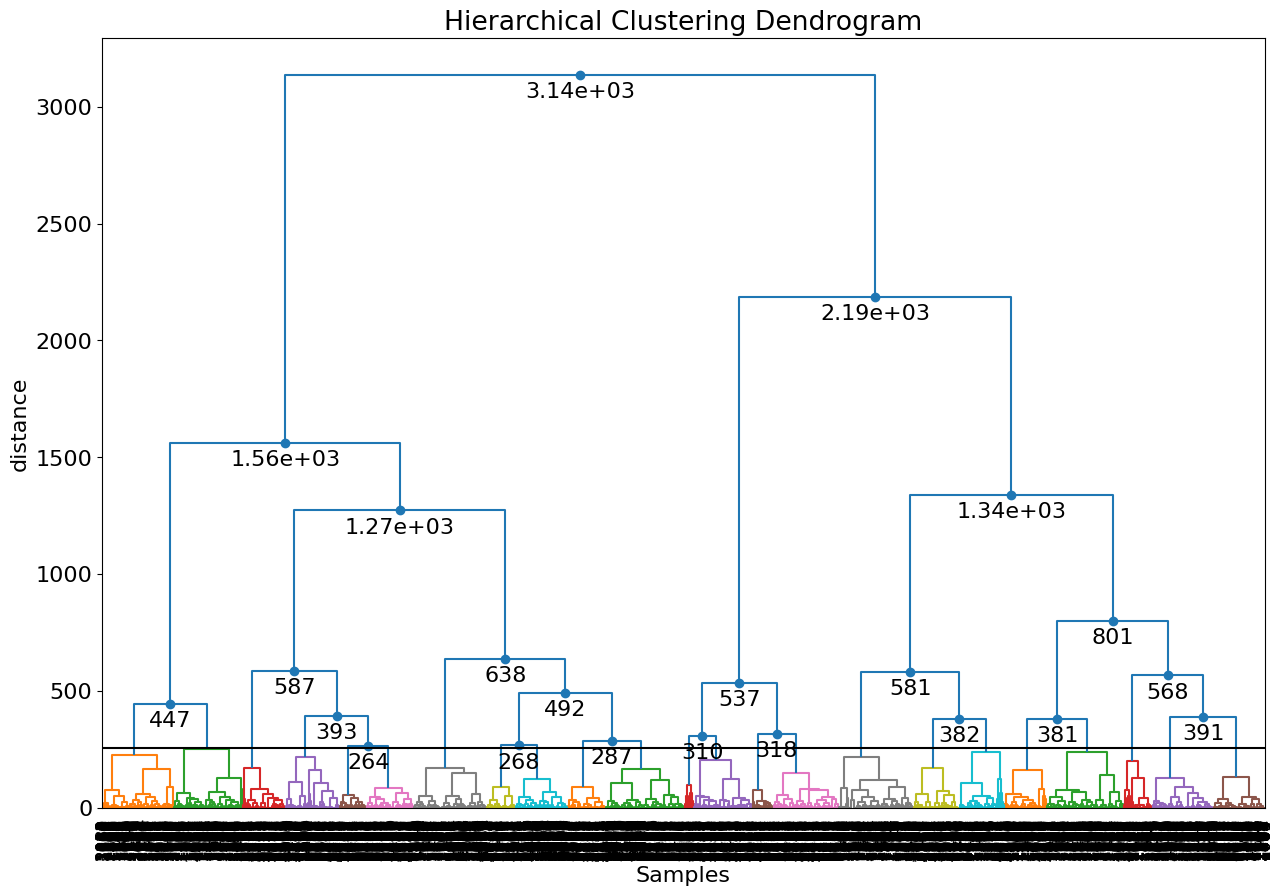

In [130]:
ce.dendrogram();


In [ ]:
# Fin